In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [33]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI_ORIGINAL = '#ebb300'
COLOR_OCKER_ANDI = '#EC7F00'
COLOR_OCKER = '#EA5C21'

COLOR_NONE = '#8E8E8D'
COLOR_NONE_DARK = '#4E4E4D'

PROGRAM_COLORS = {'getpixel':COLOR_OCKER_ANDI, 'bitblt':COLOR_OCKER, 'getdbits':COLOR_GLUTROT,'windup':COLOR_HEIDENELKE}

In [34]:
RFR = 60

In [35]:
PATH = f'./data/final_{RFR}'
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [36]:
program_data_files = []
app_data_files = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    data_in['program'] = file.split('_')[1]
    #print(file.split('_')[2])
    if 'program' in file:
        program_data_files.append(data_in)
    else:
        app_data_files.append(data_in)

In [37]:
data_program = pd.concat(program_data_files)
data_app = pd.concat(app_data_files)

In [38]:
data_program

,event_type,timestamp,color,iteration,program
0,got color at,1719485369922935,3,0,bitblt
1,got color at,1719485369939743,3,0,bitblt
2,got color at,1719485369955949,3,0,bitblt
3,got color at,1719485369972939,4,0,bitblt
4,got color at,1719485369989563,4,0,bitblt
...,...,...,...,...,...
9008,got color at,1719486015932199,-3,9,windup
9009,got color at,1719486015932207,-3,9,windup
9010,got color at,1719486015932215,-3,9,windup
9011,got color at,1719486015932224,-3,9,windup


In [39]:
data_app

,event_type,color,timestamp,iteration,program
0,start,0,1.719485e+15,0,bitblt
1,render_start,1,1.719485e+15,0,bitblt
2,render_stop,1,1.719485e+15,0,bitblt
3,render_start,2,1.719485e+15,0,bitblt
4,render_stop,2,1.719485e+15,0,bitblt
...,...,...,...,...,...
504,render_stop,252,1.719486e+15,9,windup
505,render_start,253,1.719486e+15,9,windup
506,render_stop,253,1.719486e+15,9,windup
507,render_start,254,1.719486e+15,9,windup


In [54]:
data_program = data_program[data_program['color'] >= 100]
data_program = data_program[data_program['color'] <= 110]

In [55]:
data_diffs = {}
colors = []
for program in data_program['program'].unique():
    data_diffs[program] = []
    data_current_program = data_program[data_program['program'] == program]

    for i in data_current_program['iteration'].unique():
        data_iteration = data_current_program[data_current_program['iteration'] == i]

        #diffs = []
        for color in range(5, 253):
            colors.append(color)
            start_for_color = data_app[(data_app['program'] == program) & (data_app['iteration'] == i) & (data_app['color'] == color) & (data_app['event_type'] == 'render_stop')]['timestamp'].min()
            diff = data_iteration[data_iteration['color'] == color]['timestamp'].min() - start_for_color
            data_diffs[program].append(diff)
            

        # data_diffs[program].append(mean(diffs))
        #data_diffs[program].extend(diffs)
    print(len(colors))
            
pd.DataFrame.from_dict(data_diffs)


12400
24800
37200
49600


,bitblt,getdbits,getpixel,windup
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
12395,NaN,NaN,NaN,NaN
12396,NaN,NaN,NaN,NaN
12397,NaN,NaN,NaN,NaN
12398,NaN,NaN,NaN,NaN


: 

In [51]:
data = pd.DataFrame.from_dict(data_diffs)
data_melted = data.melt(var_name='program', value_name='diff')
data_melted
data_melted['diff'] = data_melted['diff'] / 1000 

Text(0.5, 0, '')

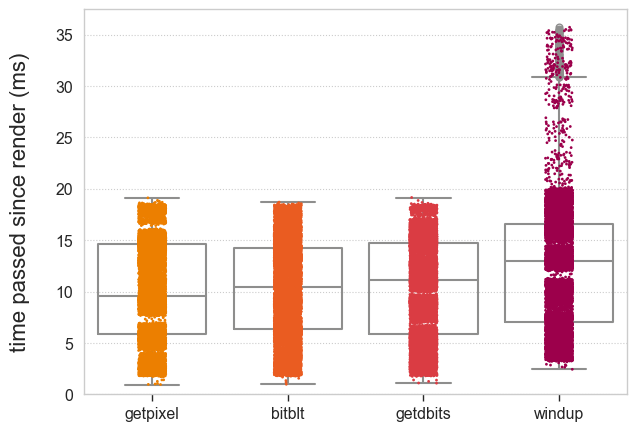

In [53]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(7, 5), "xtick.bottom": True, "grid.linestyle": ":"})

plot = sns.boxplot(data_melted, x='program', y='diff', order=['getpixel', 'bitblt', 'getdbits', 'windup'], color=COLOR_NONE, fill=False, linewidth=1.5)
plot = sns.stripplot(data_melted, x='program', y='diff', order=['getpixel', 'bitblt', 'getdbits', 'windup'], palette=[COLOR_OCKER_ANDI, COLOR_OCKER, COLOR_GLUTROT, COLOR_HEIDENELKE], size=2)

plot.set_ylim(0)
plot.set_ylabel('time passed since render (ms)', labelpad=18, fontsize=16)
plot.set_xlabel('')